## 5. Интерполяция и численное интегрирование. Формула ошибок

Постройте $11$ точек, взяв
$$
x_i = \frac{i-1}{10}, \quad y_i = {\rm erf} x_i\quad (i=1,\dots,11),
$$
где
$$
{\rm erf} x = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$
– *функция ошибок*. Для вычисления ${\rm erf} x$
воспользуйтесь `scipy.special.erf`.

* Составьте систему линейных уравнений для нахождения
коэффициентов интерполирующего многочлена $10$-й степени.
С помощью функции `scipy.linalg.cond` найдите
число обусловленности этой системы. Решите составленную систему.
Насколько достоверно полученное решение? С помощью построенного
интерполянта протабулируйте значение функции в промежуточных точках.
Чему равны абсолютная и относительная ошибки?
* Сравните коэффициенты построенного интерполирующего многочлена
с коэффициентами многочлена, который можно получить с помощью функции
`numpy.polyfit`. В чем разница?

* Постройте кубический эрмитов интерполянт (`scipy.interpolate.pchip`) и кубический сплайн
(`scipy.interpolate.spline`). Найдите значения интерполянтов в тех же точках, что и в предыдущих
пунктах и сравните результаты.

Составленная программа должна выводить исходные точки,
графики интерполируемой функции и интерполянтов
и графики зависимости чисал обусловленности от степени интерполяционного многочлена


In [35]:
import math
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from scipy.interpolate import pchip
from scipy import linalg
from scipy import interpolate
from scipy import integrate
%matplotlib inline

In [93]:
def cond(A, p=2):
    return linalg.norm(A, p)*linalg.norm(linalg.inv(A), p)
def erf(x):
    return special.erf(x) * (2/np.sqrt(np.pi))

Создадим наши массивы. Так же заполнили значения x и y по данному заданию. Вывели и нарисовали график

x[ 1 ] =  0.0
y[ 1 ] =  0.0
x[ 2 ] =  0.1
y[ 2 ] =  0.1124629160182849
x[ 3 ] =  0.2
y[ 3 ] =  0.22270258921047845
x[ 4 ] =  0.3
y[ 4 ] =  0.3286267594591274
x[ 5 ] =  0.4
y[ 5 ] =  0.42839235504666845
x[ 6 ] =  0.5
y[ 6 ] =  0.5204998778130465
x[ 7 ] =  0.6
y[ 7 ] =  0.6038560908479258
x[ 8 ] =  0.7
y[ 8 ] =  0.6778011938374183
x[ 9 ] =  0.8
y[ 9 ] =  0.7421009647076605
x[ 10 ] =  0.9
y[ 10 ] =  0.7969082124228322
x[ 11 ] =  1.0
y[ 11 ] =  0.8427007929497148


Text(0.5, 1.0, 'График функции')

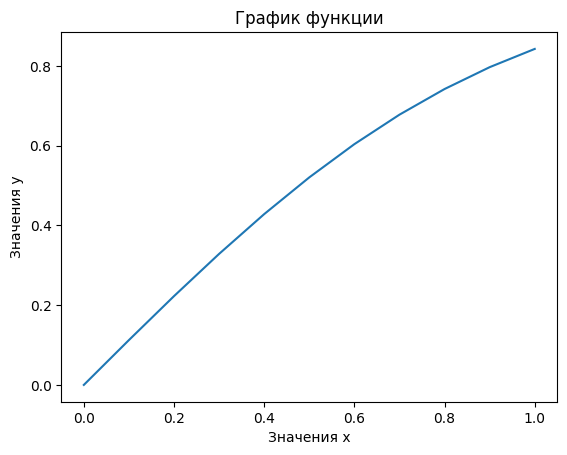

In [97]:
x = [0]*11
y = [0]*11
for i in range(1,12):
  x[i-1] = (i-1)/10
  print("x[",i,"] = ",x[i-1])
  y[i-1] = special.erf(x[i-1])
  print("y[",i,"] = ",y[i-1])

plt.plot(x,y)
plt.xlabel('Значения x')
plt.ylabel('Значения y')
plt.title('График функции')

Приступаем к интерполянту:

In [98]:
W = np.vander(x)
print(W)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e-10 1.00000000e-09 1.00000000e-08 1.00000000e-07
  1.00000000e-06 1.00000000e-05 1.00000000e-04 1.00000000e-03
  1.00000000e-02 1.00000000e-01 1.00000000e+00]
 [1.02400000e-07 5.12000000e-07 2.56000000e-06 1.28000000e-05
  6.40000000e-05 3.20000000e-04 1.60000000e-03 8.00000000e-03
  4.00000000e-02 2.00000000e-01 1.00000000e+00]
 [5.90490000e-06 1.96830000e-05 6.56100000e-05 2.18700000e-04
  7.29000000e-04 2.43000000e-03 8.10000000e-03 2.70000000e-02
  9.00000000e-02 3.00000000e-01 1.00000000e+00]
 [1.04857600e-04 2.62144000e-04 6.55360000e-04 1.63840000e-03
  4.09600000e-03 1.02400000e-02 2.56000000e-02 6.40000000e-02
  1.60000000e-01 4.00000000e-01 1.00000000e+00]
 [9.76562500e-04 1.95312500e-03 3.90625000e-03 7.81250000e-03
  1.56250000e-02 3.12500000e-02 6.25000000e-02 1.25000000e-01
  2.50000000e-01

Создаем ещё два массива(а ещё нам помогла функция сверху(cond), которую мы сами написали), чтобы в итоге найти коэфиценты интерполянта.
А также нашли обусловленность:

In [99]:
print("cond (1): ",cond(W,1))
print("cond (2): ",cond(W,2))
print("cond (inf+): ",cond(W,np.inf))
f = np.polyfit(x, y, 10)
A = linalg.solve(W, y)

cond (1):  341429088.020934
cond (2):  115575244.55218327
cond (inf+):  400423280.4480659


Значения довольно большие, так что думаю, что эта матрица близка к вырожденной

Далее находим погрешности:

In [101]:
for i in range(1,12):
  print("y[",i,"] = ",y[i-1]," and matrix: ",A[i-1])
  abs_err = abs(y[i-1]-A[i-1])
  print("Абсолютная ошибка: ",abs_err, " Относительная: ", abs_err / y[i-1])

y[ 1 ] =  0.0  and matrix:  -0.0014653703671109915
Абсолютная ошибка:  0.0014653703671109915  Относительная:  inf
y[ 2 ] =  0.1124629160182849  and matrix:  0.005416622695248126
Абсолютная ошибка:  0.10704629332303678  Относительная:  0.9518363662705718
y[ 3 ] =  0.22270258921047845  and matrix:  0.002139053136345263
Абсолютная ошибка:  0.22056353607413318  Относительная:  0.9903950234978022
y[ 4 ] =  0.3286267594591274  and matrix:  -0.029966974375353703
Абсолютная ошибка:  0.3585937338344811  Относительная:  1.091188479065658
y[ 5 ] =  0.42839235504666845  and matrix:  0.0022291246209577916
Абсолютная ошибка:  0.42616323042571064  Относительная:  0.9947965350111933
y[ 6 ] =  0.5204998778130465  and matrix:  0.11187642372936142
Абсолютная ошибка:  0.4086234540836851  Относительная:  0.7850596541935304
y[ 7 ] =  0.6038560908479258  and matrix:  0.00025683818695237677
Абсолютная ошибка:  0.6035992526609735  Относительная:  0.9995746698744205
y[ 8 ] =  0.6778011938374183  and matrix:  -0

<ipython-input-101-7056948de2e3>:4: RuntimeWarning: divide by zero encountered in double_scalars
  print("Абсолютная ошибка: ",abs_err, " Относительная: ", abs_err / y[i-1])


In [41]:
print(f)
print("=================================")
print(A)

[-1.81541508e-03  6.99182397e-03 -9.06336099e-04 -2.66590515e-02
  1.42863635e-05  1.12819182e-01  3.51776639e-06 -3.76126475e-01
 -3.56818039e-08  1.12837917e+00 -1.88293971e-16]
[-1.81541508e-03  6.99182395e-03 -9.06336079e-04 -2.66590515e-02
  1.42863496e-05  1.12819182e-01  3.51776404e-06 -3.76126475e-01
 -3.56817841e-08  1.12837917e+00  0.00000000e+00]


В целом значения практически одинаковые. Есть только два "но":
1. Иногда значение незначительно отличаются, но погрешность минимальна
2. Последний коэфицент отличается сильно. В моём случае это ноль, а в случае другого массива - довольно убеждающее значение

Эрмитов интерполянт:

<ipython-input-88-e2b4ca088b82>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_interp, y_interp,  'or', color = 'tab:orange')


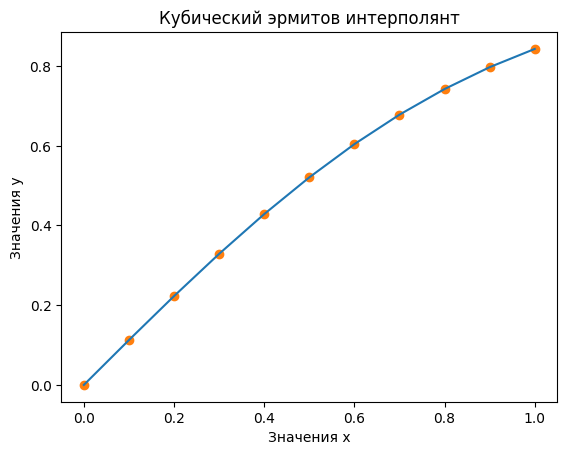

In [88]:
interp = pchip(x, y)

x_interp = np.linspace(0, 1, 11)
y_interp = interp(x_interp)

plt.plot(x_interp, y_interp,  'or', color = 'tab:orange')
plt.plot(x, y)
plt.xlabel('Значения x')
plt.ylabel('Значения y')
plt.title('Кубический эрмитов интерполянт')
plt.show()


Видно сходимость с изначальным графиком, но есть слабые видимые отклонения

Кубический сплайн:

<ipython-input-89-e6680c0704f8>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'or', color = 'tab:orange')


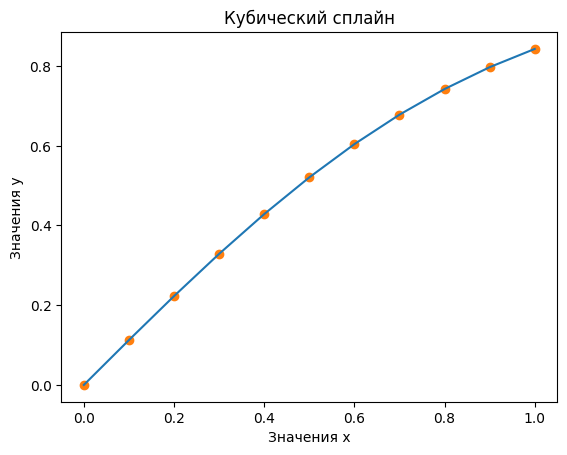

In [89]:
f = interpolate.interp1d(x, y, kind = 'cubic')
xx = np.linspace(0, 1, 11)
yy = f(xx)
plt.plot(x, y, 'or', color = 'tab:orange')
plt.plot(xx, yy, color = 'tab:blue')
plt.xlabel('Значения x')
plt.ylabel('Значения y')
plt.title('Кубический сплайн')
plt.show()
pass

В принципе, отличий от прошлого графика (по крайней мере, визуально) я не замечаю

Так же делаем график зависимости числа обусловленности от степени многочлена:

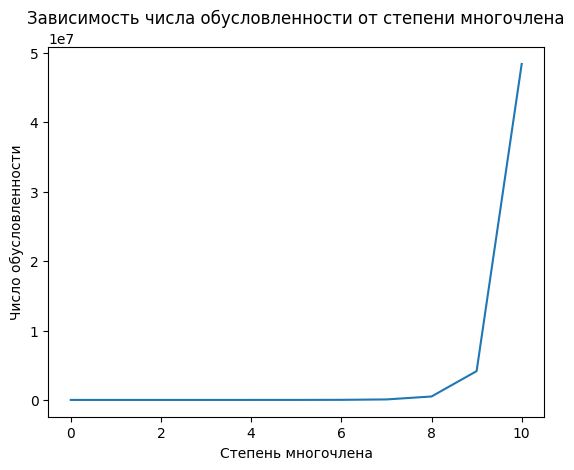

In [90]:
def func(x):
  return special.erf(x)
x_vals = np.linspace(-0.1, 0.9, 11)
cond_nums = []
for i in range(0, 11): 
    p = np.polyfit(x_vals, func(x_vals), i)
    V = np.vander(x_vals, i + 1, increasing=True)
    cond_nums.append(np.linalg.cond(V))

plt.plot(np.arange(0, 11), cond_nums)
plt.xlabel('Степень многочлена')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности от степени многочлена')
plt.show()
